#Projeto Final do Módulo DS-PY-001 - LÓGICA DE PROGRAMAÇÃO I (PY)

##Dupla 5 - Advinhe o Anagrama

###Requisitos:
    - Tem que ter número máximo de tentativas; 
    - Se encontrar a letra certa, printar na posição certa;
    - Mensagem de erro;
    - Palavra inicial colocada escondido.
    - Bonus: Tentar o bonequinho enforcado como na forca.

##Autores
- Joelson da S. Ferreira (Joe)
- Nilo B. Silva Jr.

##TEORIA



Anagrama: De quantas formas diferentes podemos escrever outras palavras com as mesmas letras.


> Ex: uva = uav, vua, vau, avu e auv.


Para saber quantas variações, **sem** repetição de letras, usamos o fatorial.

> "uva" tem 3 letras


> 3! = 3 x 2 x 1 = 6


> Logo, há 6 variações possíveis.

Para saber quantas variações, **com** repetição de letras, usamos divisão de fatoriais da seguinte forma:



> "osso" tem 4 letras no total; "o" e "s" repetem-se duas vezes cada.


> 4! / (2! x 2!) = 24 / (2 x 2) = 24 / 4 = 6


> Há 6 variações possíveis.



##COMO JOGAR

Desembaralhe a PALAVRA em até 3 tentativas.

Após cada palpite, a cor das letras mudará para mostrar o quão próximo seu palpite estava da palavra:

> A letra com cor de fundo verde e marcada com o (*) está no local correto.


> A letra com cor de fundo vermelha está no lugar incorreto.


##Bibliotecas utilizadas

In [1]:
from random import choice, shuffle        # Importando os comandos choice e shuffle da biblioteca de números aleatórios random

## Banco de dados

###Banco de Palavras do Jogo

In [2]:
banco_palavras = open('Banco_Palavras.txt', 'r')   #Abre o arquivo TXT com as palavras
lista_palavras = banco_palavras.read().split(', ') #Lê o arquivo TXT e armazena as palavras em uma lista
banco_palavras.close()   

## Funções

###Função para imprimir as instruções

In [3]:
def imprime_instrucoes():
  txt = '\n{:#^100}\n' + \
        '{:#^100}\n'+ \
        '{:#^100}\n'+\
        '\n{:#^100}\n'+\
        '\nDesembaralhe a PALAVRA em até 3 tentativas.\n'+\
        '\nApós cada palpite, a cor de fundo das letras mudará para mostrar o quão próximo seu palpite estava\n'+\
        'da palavra.\n'+\
        '\nExemplo:\n'+\
        '\n\033[0;37;41m S \033[0;0m \033[0;37;42m E* \033[0;0m \033[0;37;42m N* \033[0;0m \033[0;37;41m D \033[0;0m \033[0;37;42m O* \033[0;0m \n'+\
        '\nA letra com cor de fundo \033[0;37;42m verde \033[0;0m e sinalizada com * está no local correto.\n'+\
        'A letra com cor de fundo \033[0;37;41m vermelho \033[0;0m está no lugar incorreto.\n'                     # Cores via tabela de cores ANSI
  print(txt.format('',' B E M  V I N D O  A O  J O G O  A N A G R A M A ','',' I N S T R U Ç Õ E S '))  
  

Codificação de cores via tabela de cores ANSI

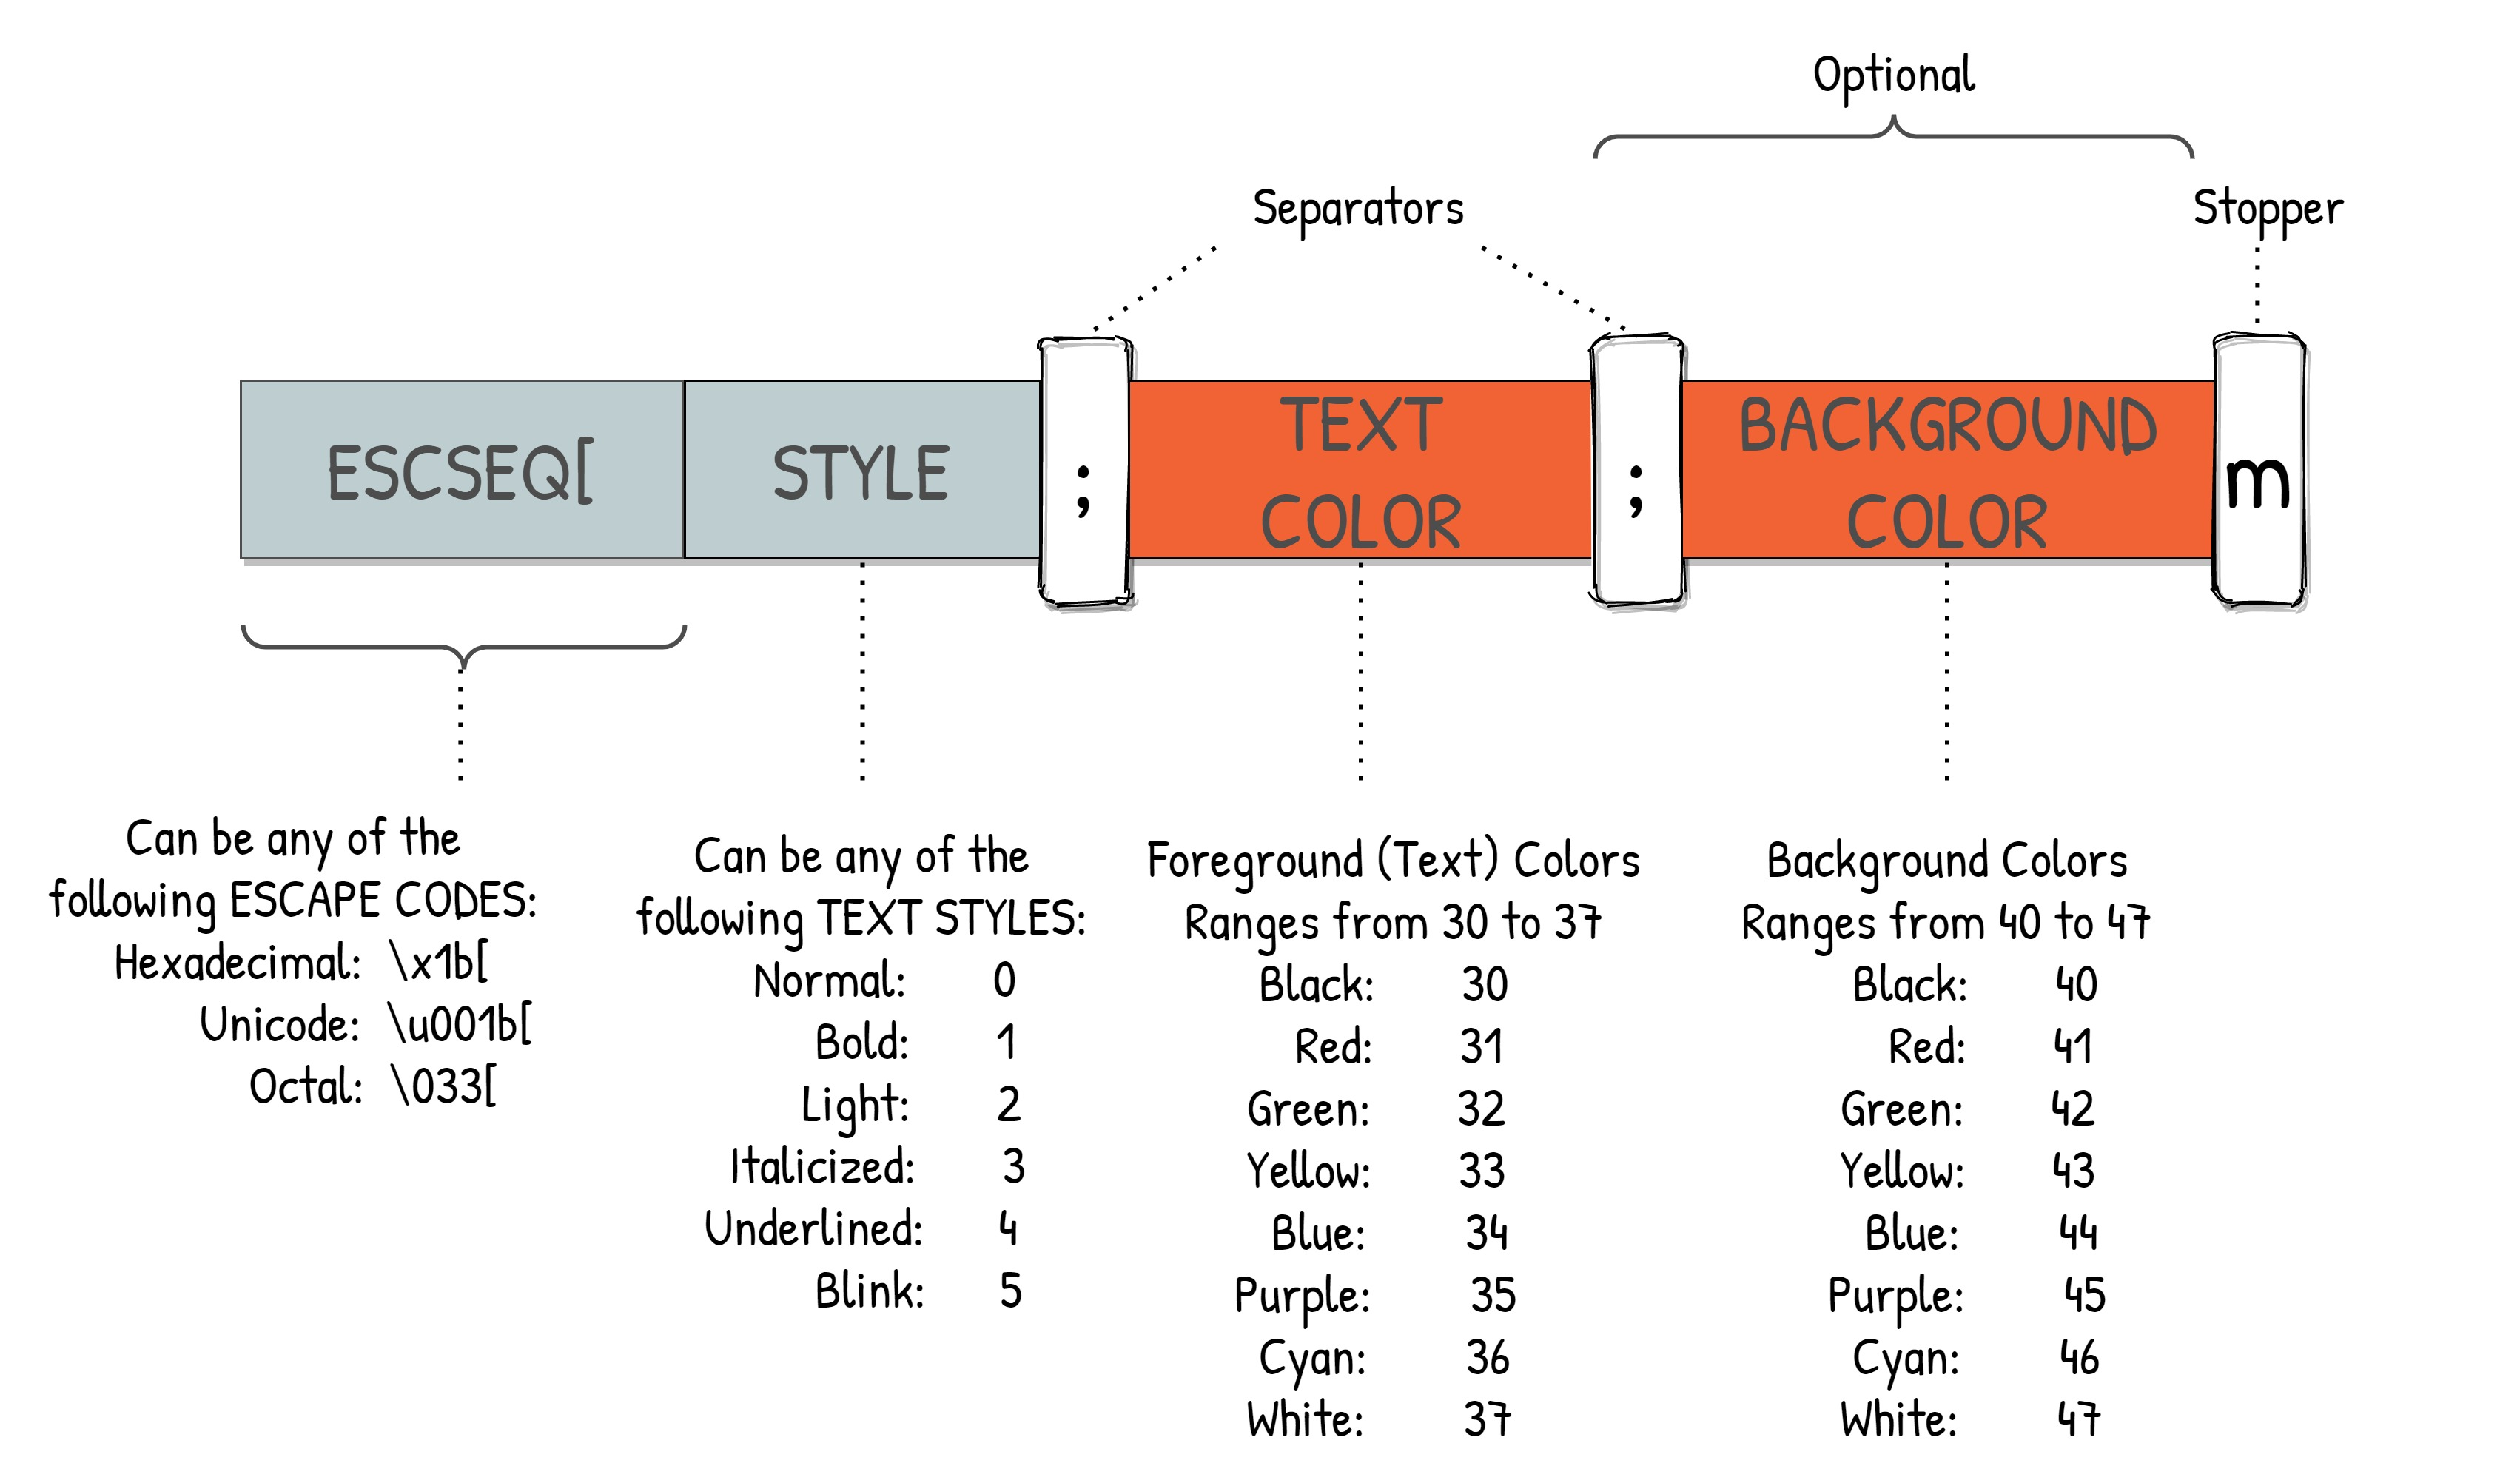

###Função para selecionar e embaralhar a palavra

In [4]:
def seleciona_embaralha_palavra():
  palavra_selecionada = ''
  palavra_embaralhada = ''
  while palavra_selecionada == palavra_embaralhada:             # Não permite que no embaralhamento, a palavra fique da forma correta.
    palavra_selecionada = choice(lista_palavras)                # Seleciona uma palavra da lista
    palavra_p_embaralhar = list(palavra_selecionada)            # Transforma a palavra selecionada em uma lista de letras
    shuffle(palavra_p_embaralhar)                               # Embaralha a lista de letras
    palavra_embaralhada = ''.join(palavra_p_embaralhar)         # Transforma a lista embaralhada em uma palavra embaralhada
  return palavra_selecionada, palavra_embaralhada               # Retorna a palavra selecionada e a embaralhada

### Função para verificar se o jogador acertou alguma letra da palavra

In [5]:
def verifica_acerto(palavra_digitada, palavra_selecionada):
  acertos = 0
  print('Correção: ',end='')
  for i in range(len(palavra_selecionada)):                                     #Percorre a palavra selecionada, letra por letra
    if palavra_digitada[i] == palavra_selecionada[i]:                           #Testa se a letra digitada é igual a letra da palavra, posição por posição
      acertos+=1
      print('\033[0;37;42m {}* \033[0;0m '.format(palavra_digitada[i]), end='') #Imprime com o fundo verde se acertou a letra
    else:
      print('\033[0;37;41m {} \033[0;0m '.format(palavra_digitada[i]), end='')  #Imprime com o fundo vermelho se errou a letra
  return acertos


###Função para desenhar a forca

In [6]:
def desenha_forca(tentativa):
  if tentativa == 0:
    print('\n  ____    \n | /  |    \n |/        \n |         \n |         \n |         \n_|_        ')
  elif tentativa == 1:
    print('\n  ____    \n | /  |    \n |/  (_)   \n |         \n |         \n |         \n_|_        ')
  elif tentativa == 2:
    print('\n  ____    \n | /  |    \n |/  (_)   \n |   \|/   \n |         \n |         \n_|_        ')
  else:
    print('\n  ____    \n | /  |    \n |/  (_)   \n |   \|/   \n |    |    \n |   / \   \n_|_        ')

## Main do Jogo

### O jogo

In [7]:
def jogar():
  sair_do_jogo = False
  imprime_instrucoes()
  rodadas = 0                                                                                #iniciando o contador de rodadas
  acertos = 0                                                                                #iniciando o contador de acertos

  while not sair_do_jogo:                                                                    #Executa até jogador pedir pra sair
    palavra_selecionada, palavra_embaralhada = seleciona_embaralha_palavra()                 #Chama a função que seleciona a palavra do banco e a embaralha.
    acertou = False
    rodadas += 1

    for tentativa in range(1,4):                                                             #Solicita uma palavra até acertar ou esgotar as 3 tentativas.
      print('\n{:#^100s}\n\n{:^100s}\n'.format(f' Palavra embaralhada: {palavra_embaralhada} ',f'{tentativa}ª tentativa '))
      palavra_digitada = input('Digite a palavra: ').upper() + (' ' * len(palavra_selecionada))
      letras_certas = verifica_acerto(palavra_digitada, palavra_selecionada)                 #Verifica quantas letras acertou 

      if letras_certas == len(palavra_selecionada):                                           #Verifica se acertou todas as letras
        acertou = True
        desenha_forca(tentativa -1)                                                           #Se acertou, desenha a forca anterior
        print('\n\n{:#^100s}\n'.format(f' Parabéns. Você acertou a palavra {palavra_selecionada} na {tentativa}ª tentativa! '))
        acertos += 1
        break
      else:
        desenha_forca(tentativa)                                                              #Se errou, desenha a forca da tentativa
        print(f'\nTente novamente!' if tentativa <=2 else f'\nVocê não conseguiu acertar. A palavra corretar era: {palavra_selecionada}\n')

    print('\n{:#^100s}\n'.format(' FIM DA RODADA '))
    
    while True:                                                                                #Verifica se quer jogar novamente ou sair do jogo
      continuar = input('Deseja jogar novamente? (S/N): ').upper()
      if continuar == 'S':
        imprime_instrucoes()
        break
      elif continuar == "N":
        print('\n{:^100s}\n{:#^100s}'.format(f' Você acertou {acertos} de {rodadas} rodada(s).',' Jogo Finalizado! '))
        sair_do_jogo = True 
        break      
      else:
        print('\nOpção incorreta.\n')

##Iniciar o Jogo

In [ ]:
jogar()